# **Exploratory Data Analysis**


# Importing Libraries 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading dataset from csv

In [2]:
df=pd.read_csv('retail.csv')

# Data overview

In [3]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [4]:
#summary of dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


# Missing values 

In [5]:
# percentage of missing values in each colm
(df.isnull().sum()/df.shape[0])*100

Transaction ID       0.000000
Customer ID          0.000000
Category             0.000000
Item                 9.646123
Price Per Unit       4.842942
Quantity             4.803181
Total Spent          4.803181
Payment Method       0.000000
Location             0.000000
Transaction Date     0.000000
Discount Applied    33.391650
dtype: float64

In [6]:
# total missing values
df.isnull().sum().sum()

7229

### Visualising null values

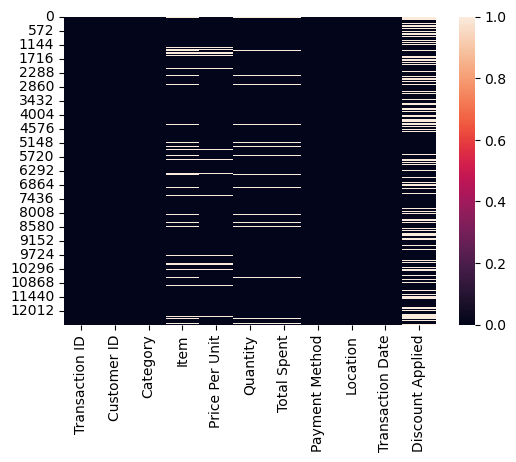

In [7]:
plt.figure(figsize=(6, 4)) 
sns.heatmap(df.isnull())
plt.show()

# Handling Missing Values

### Category-wise Mode Imputation 

In [8]:
#filling missing values in 'Discount Applied' colume by Mode value of their item category
df['Discount Applied'] = df['Discount Applied'].fillna(df.groupby('Category')['Discount Applied'].transform(lambda x: x.mode().iloc[0]))

In [9]:
df['Discount Applied'].isnull().sum()

0

In [10]:
#filling missing values in 'Item' colume by most frequent item in that product category
df['Item'] = df['Item'].fillna(df.groupby('Category')['Item'].transform(lambda x: x.mode().iloc[0]))

In [11]:
df['Item'].isnull().sum()

0

### 

Category-wise Median Imputation

In [12]:
# filling missing values in column 'Price Per Unit' using Category-wise median value
df['Price Per Unit'] = df['Price Per Unit'].fillna(df.groupby('Category')['Price Per Unit'].transform('median'))


In [13]:
df['Price Per Unit'].isnull().sum()

0

In [14]:
# filling missing values in column 'Quantity' using Category-wise median value
df['Quantity'] = df['Quantity'].fillna(df.groupby('Category')['Quantity'].transform('median'))

In [15]:

df['Quantity'].isnull().sum()

0

In [16]:
# filling missing values in column 'Total spent' using Category-wise median value
df['Total Spent'] = df['Total Spent'].fillna(df.groupby('Category')['Total Spent'].transform('median'))

In [17]:
df['Total Spent'].isnull().sum()

0

In [18]:
#final check for missing value
df.isnull().sum()

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64

## Datatype Modifications

In [22]:
# Force all values to string first (handles NaN, etc.), then remove prefix, then convert to float
df['Transaction ID'] = df['Transaction ID'].astype(str).str.replace('TXN_', '').astype(float)
df['Customer ID'] = df['Customer ID'].astype(str).str.replace('CUST_', '').astype(float)

In [23]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,6867343.0,9.0,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,3731986.0,22.0,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,9303719.0,2.0,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,9458126.0,6.0,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,True
4,4575373.0,5.0,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


## 📊 Outlier Detection using Boxplot

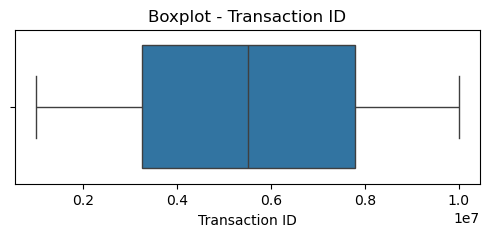

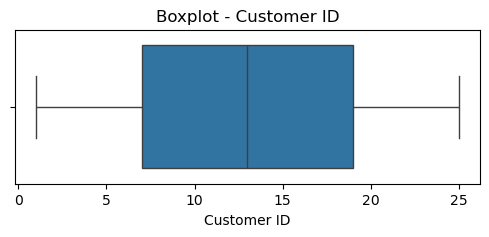

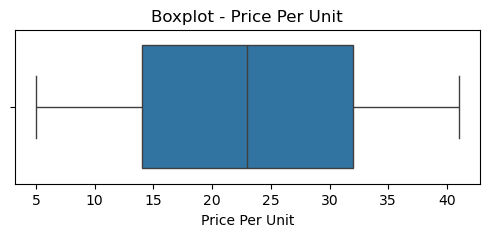

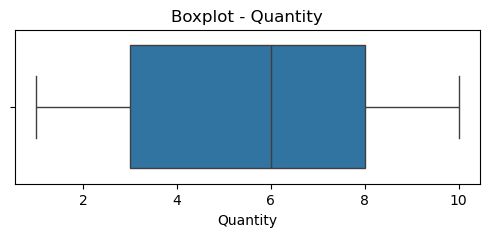

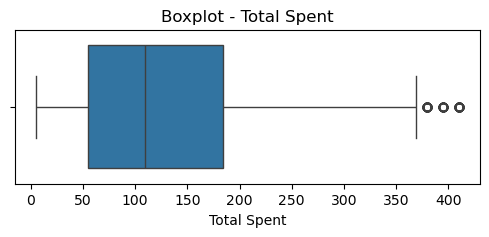

In [24]:
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()

### 📊Insights from Boxplot

#### 1. Price Per Unit
- ✅ Symmetrical distribution with no outliers.
- ✅ Price range is approximately ₹5 to ₹40.
- 🔍 **Insight**: Prices are consistent with a focused product pricing strategy.

#### 2. Quantity
- ✅ Balanced distribution, no visible outliers.
- ✅ Quantity per transaction ranges from 1 to 10 units.
- 🔍 **Insight**: Customers generally buy in small quantities, indicating individual or household-level purchases.

#### 3. Total Spent
- ⚠️ Presence of outliers on the higher end.
- 📉 Right-skewed distribution; median closer to Q1.
- 🔍 **Insight**: Some high-value transactions suggest occasional bulk buyers or premium customers. Worth exploring further for segmentation or loyalty targeting.
  ### ❌ Why Capping Was Not Used for Outliers

In this dataset, although outliers were visually detected using boxplots, capping (also known as winsorizing) was intentionally **not applied** for the reason of **Business Awareness**, Outliers might represent real high-value purchases or rare but valid cases (e.g., bulk purchases)

## 🔍 Univariate Analysis 

In [25]:
#Separate numerical Variables
num_cols = df.select_dtypes(include='float64').columns


In [26]:
df[num_cols].describe().T  #for summary stats

,count,mean,std,min,25%,50%,75%,max
Transaction ID,12575.0,5.512793e+06,2.608869e+06,1002182.0,3268480.0,5512573.0,7782484.5,9999729.0
Customer ID,12575.0,1.304358e+01,7.188038e+00,1.0,7.0,13.0,19.0,25.0
Price Per Unit,12575.0,2.338266e+01,1.048581e+01,5.0,14.0,23.0,32.0,41.0
Quantity,12575.0,5.552922e+00,2.790274e+00,1.0,3.0,6.0,8.0,10.0
Total Spent,12575.0,1.285687e+02,9.258708e+01,5.0,55.0,109.5,184.0,410.0


#### Histogram + KDE for Distribution:

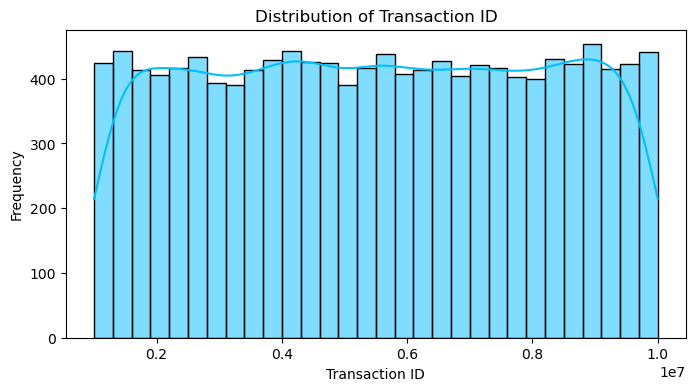

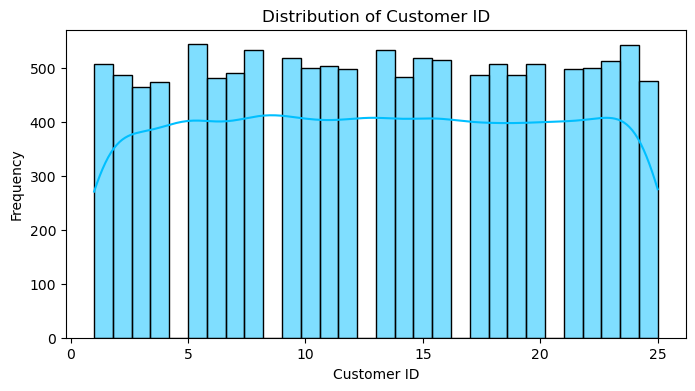

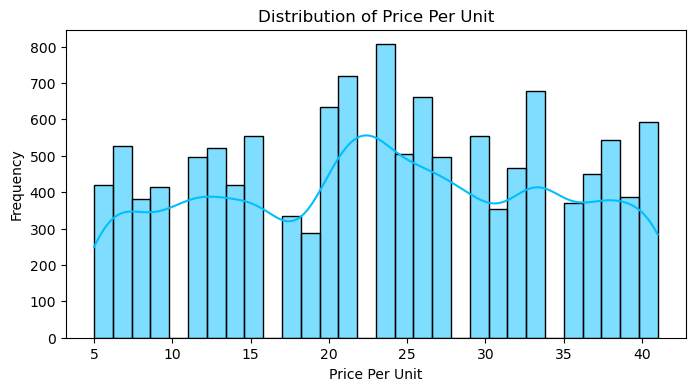

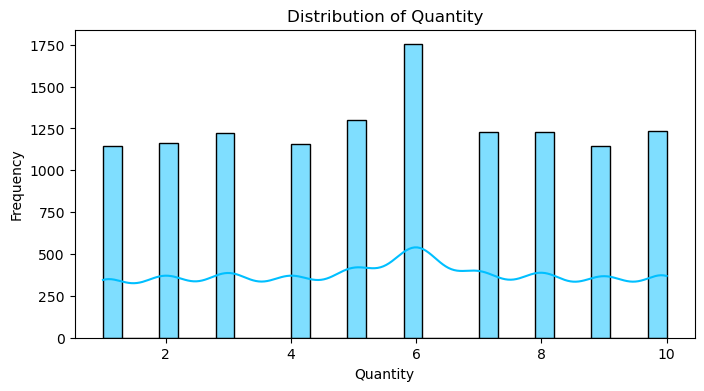

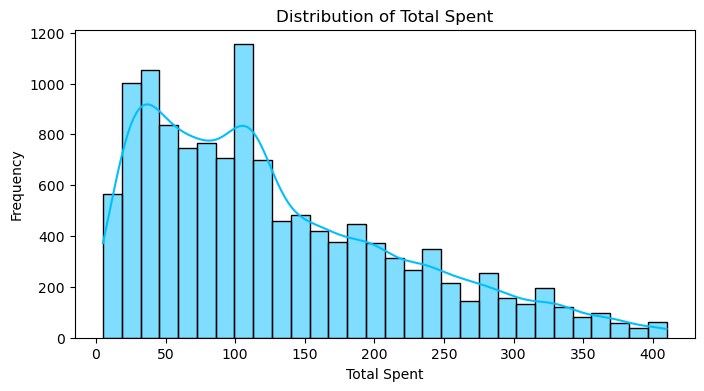

In [27]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30, color="deepskyblue")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [28]:
#Skewness
df[num_cols].skew()

Transaction ID   -0.005789
Customer ID      -0.003838
Price Per Unit   -0.040430
Quantity         -0.029857
Total Spent       0.882334
dtype: float64

### 📊 Insights from Univariate analysis 

#### 1. Price Per Unit
The histogram shows a nearly uniform distribution of price values ranging from ₹5 to ₹40. This suggests a wide and evenly priced product portfolio, potentially targeting different customer affordability segments.

#### 2. Quantity
The distribution is discrete with sharp peaks at integer values, especially at quantity = 6. This might be due to common packaging or consumer preference for half-dozen/multiples. Such patterns are valuable for inventory planning.

#### 3. Total Spent
The distribution of total spending is right-skewed, where most transactions are of smaller amounts, while a few high-value purchases form the long tail. This skewness can help in identifying premium customers and studying their purchase behavior separately.


## 🔍 Bivariate Analysis

### Using Boxplot:

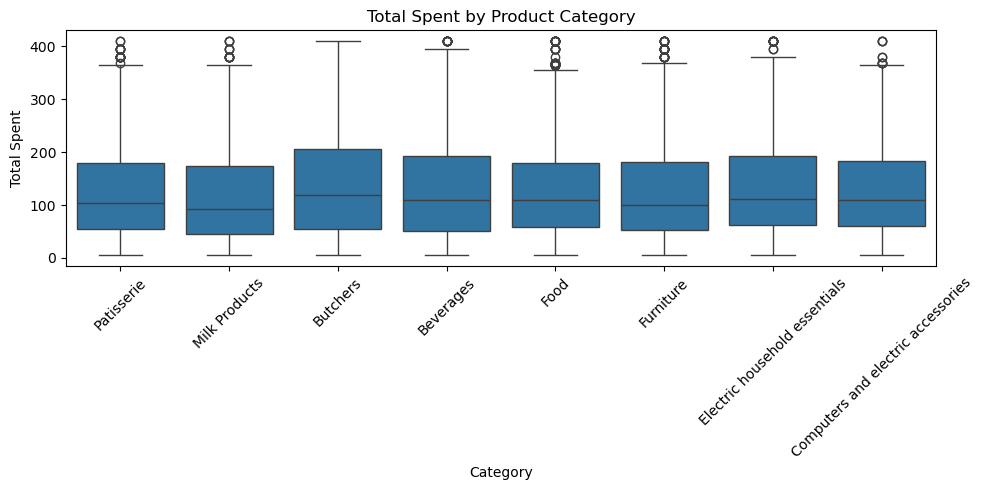

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Category', y='Total Spent', data=df)
plt.title('Total Spent by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 📊 Bivariate Analysis: Total Spent by Product Category

This boxplot reveals various facets of customer spending behavior by category:

- **Median values** are comparable across most categories (₹90–₹120), with **Butchers** and **Furniture** slightly higher—suggesting more substantial purchase amounts.
- **Variability** is highest for categories like **Butchers**, **Beverages**, and **Computers & Electric Accessories**, suggesting a mix of low and high purchase values.
- **Outliers** (large dots beyond whiskers) appear in nearly all categories, emphasizing the presence of occasional high-value transactions.
- Categories like **Milk Products** and **Food** show tight boxes and short whiskers, indicating consistent, lower-spending behavior.

🧠 *Implication:* Categories with higher variability and frequent outliers may represent bulk-buying opportunities or premium pricing strategies. These insights can guide segmentation, promotional targeting, and inventory planning.


## Multivariate Analysis

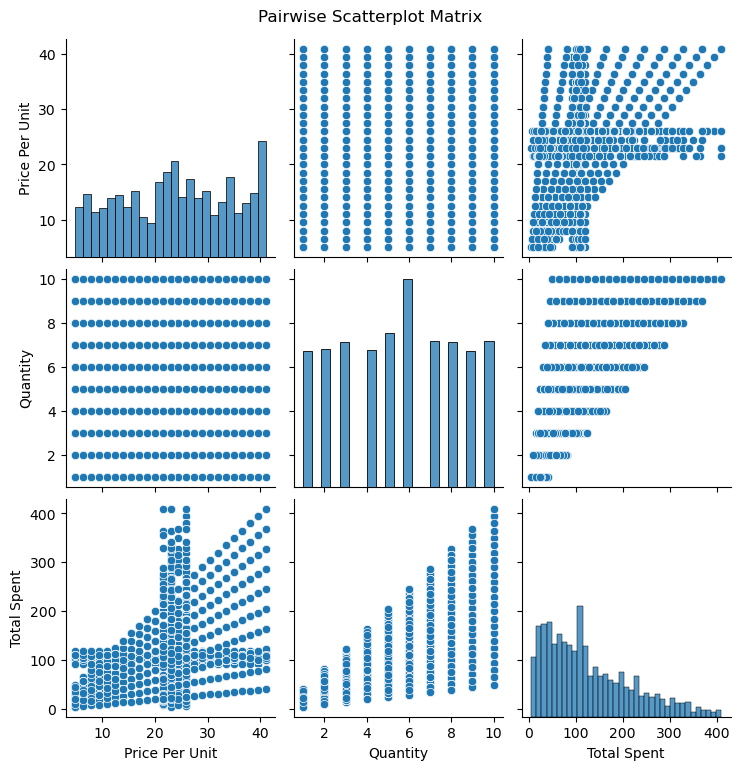

In [30]:
# Using pairplot
sns.pairplot(df[['Price Per Unit','Quantity','Total Spent']])
plt.suptitle("Pairwise Scatterplot Matrix", y=1.02)
plt.show()

### 📌 Insights from Multivariate Analysis

- **Total Spent vs Quantity**: Shows a strong positive linear relationship, suggesting spending is primarily driven by the number of items purchased.
- **Total Spent vs Price Per Unit**: Shows a moderate positive trend, but with wider spread. Higher prices do not always result in higher total spend.
- **Quantity vs Price Per Unit**: No strong correlation observed; customers seem to purchase varying quantities regardless of unit prices.

#### Diagonal Histogram Observations:
- **Price Per Unit**: Fairly uniform distribution across ₹5 to ₹40.
- **Quantity**: Right-skewed, most customers buy 1–4 items.
- **Total Spent**: Heavily right-skewed, most transactions are low-value with a few high-value outliers.

🧠 *Interpretation*: Customer spending behavior is more quantity-driven than price-driven, which may indicate a low price sensitivity in this market segment.


## 🔬 Exploring Quantity Sold Across Product Segments


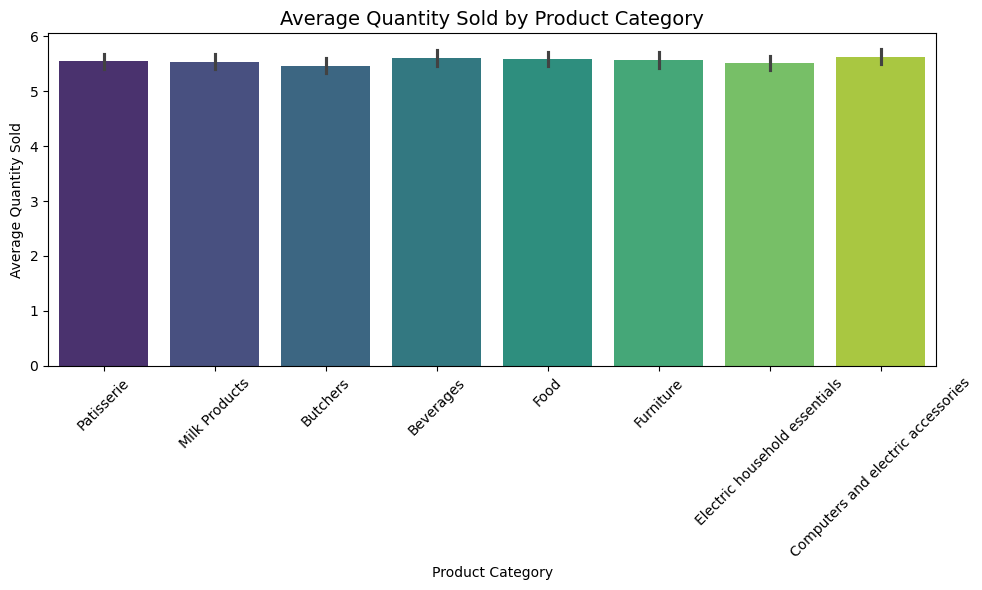

In [36]:
# ----------- 1. Barplot: Average quantity sold per product category ----------- #
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Quantity',estimator='mean', data=df, palette='viridis')
plt.title('Average Quantity Sold by Product Category', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Average Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

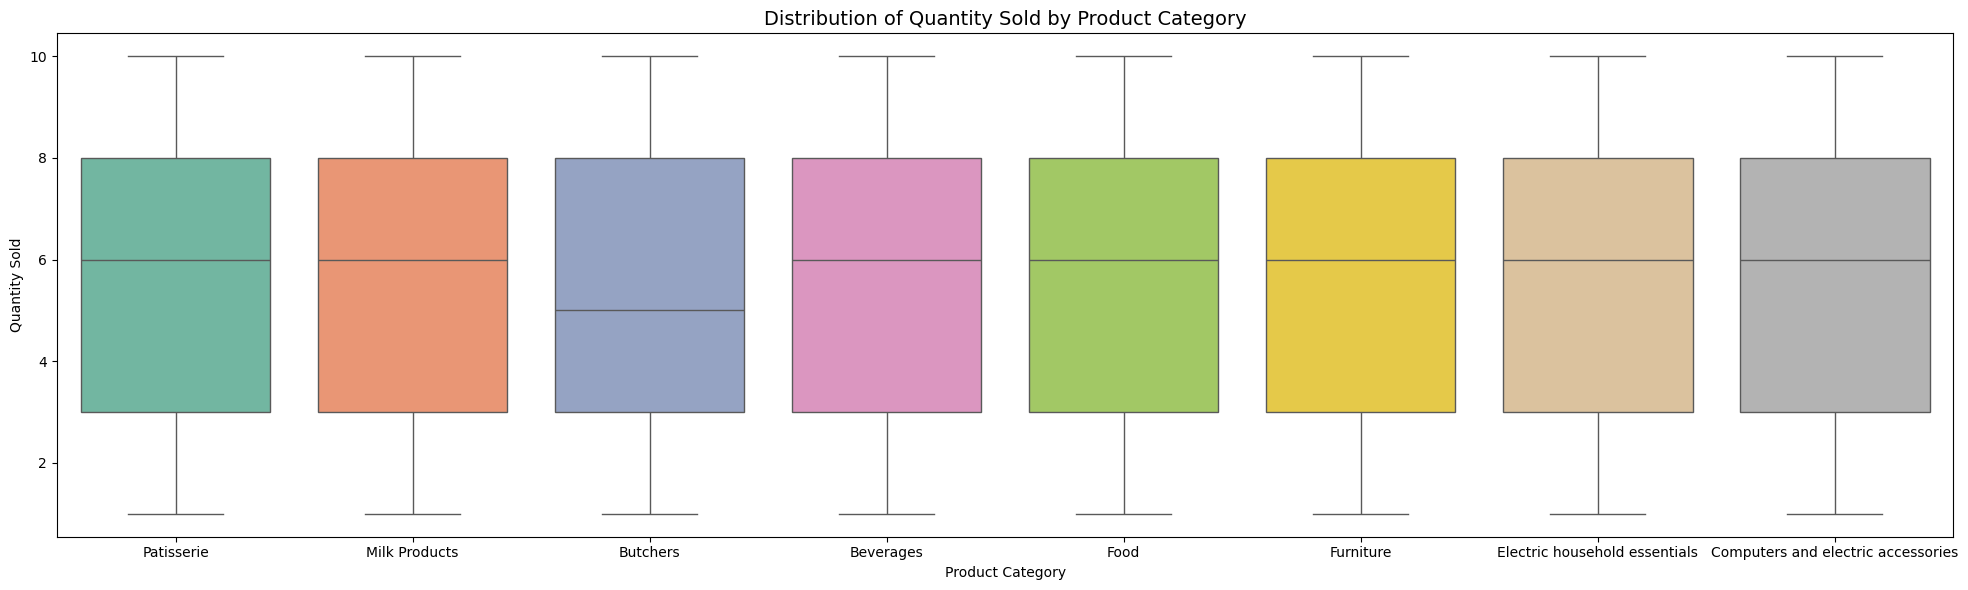

In [44]:
# ----------- 2. Boxplot: Distribution of quantity sold ----------- #
plt.figure(figsize=(20,6))
sns.boxplot(x='Category', y='Quantity', data=df, palette='Set2')
plt.title('Distribution of Quantity Sold by Product Category', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()


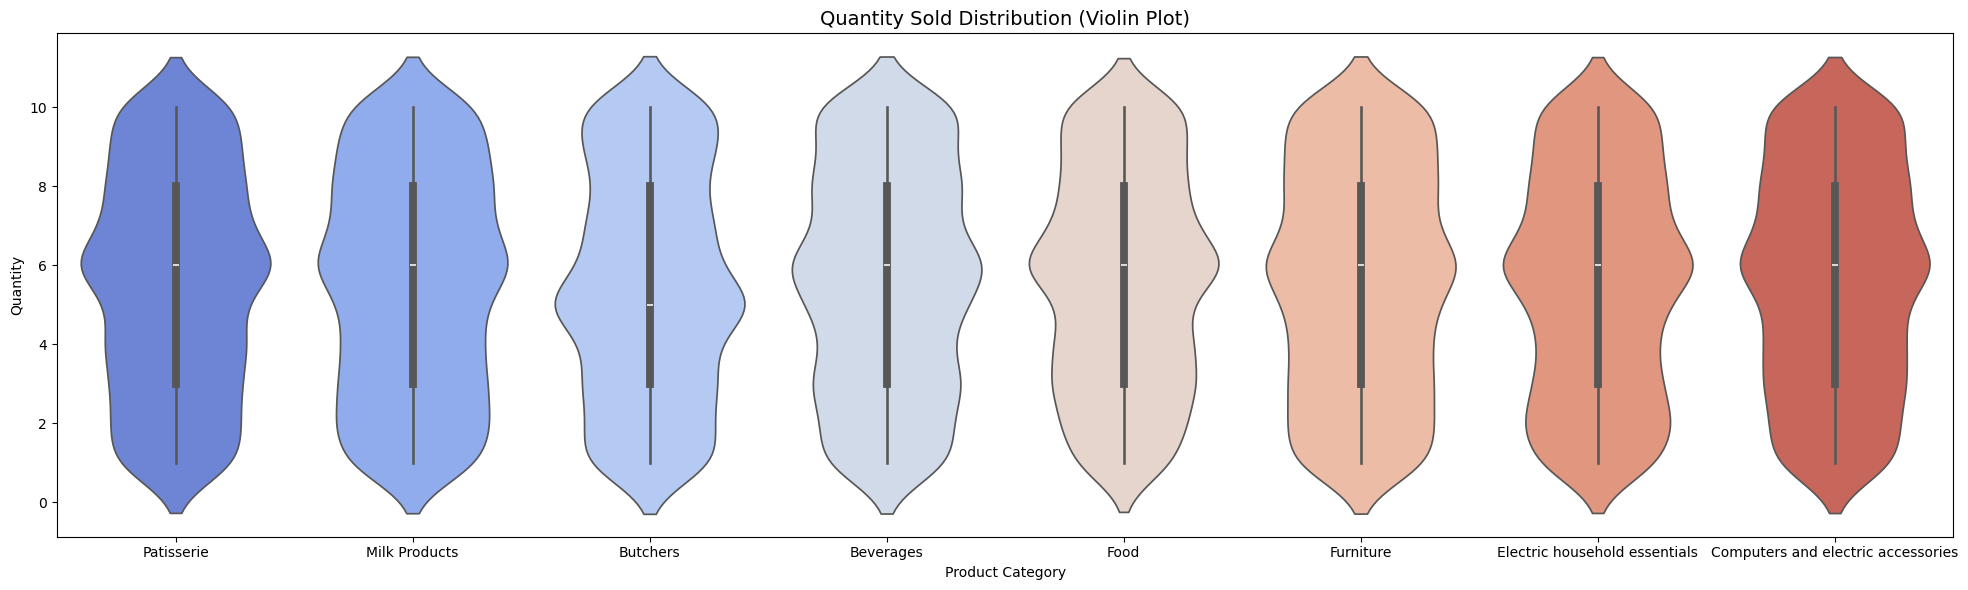

In [47]:
 #----------- 3. Violin Plot ----------- #
plt.figure(figsize=(20,6))
sns.violinplot(x='Category', y='Quantity', data=df, palette='coolwarm')
plt.title('Quantity Sold Distribution (Violin Plot)', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

### 📊 Insights: Quantity Sold by Product Category

#### 1. **Bar Plot (Average Quantity Sold)**
- All product categories have fairly similar average quantities sold.
- **Plasticware** and **Milk Products** show slightly higher average sales than others.
- **Computers and Electric Accessories** have the lowest average quantity sold, although the difference is not very large.
- The error bars indicate minimal variability across product categories.

#### 2. **Box Plot (Distribution of Quantity Sold)**
- Most product categories have a **similar interquartile range (IQR)**, reflecting comparable spread in sales volume.
- **Beverages** and **Milk Products** display higher upper whiskers, suggesting occasional high sales volumes.
- **Food** and **Furniture** have compact distributions, with fewer extreme values.
- **Outliers** are present in categories like **Plasticware** and **Beverages**.

> 📌 These plots help identify both central tendency and variability of sales across different product categories, which is crucial for product-specific inventory or marketing strategies.


## 📊 Analysis of Total Spending by Payment Method


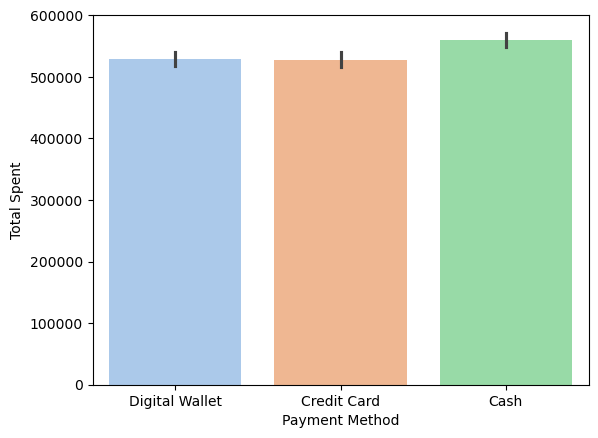

In [53]:
sns.barplot(x='Payment Method',y='Total Spent',estimator='sum',data=df, palette='pastel')
plt.show()

### 💳 Insights-Total Spending by Payment Method

- **Cash** transactions contributed the **highest total spending**, indicating a strong customer preference for cash payments or possibly larger-value purchases made in cash.
- **Digital Wallets** and **Credit Cards** follow closely, with **slightly lower total spending**, showing competitive usage across digital modes.
- The differences in total values suggest that all payment methods are widely used, but **Cash still holds dominance** in overall contribution.

> 📌 This insight can help inform strategies like promoting digital wallet offers or cash-back incentives to shift consumer behavior toward digital channels.


## Discounted Items:

In [57]:
# Filter rows where Discount Applied is True
discounted_items = df[df['Discount Applied'] == True]

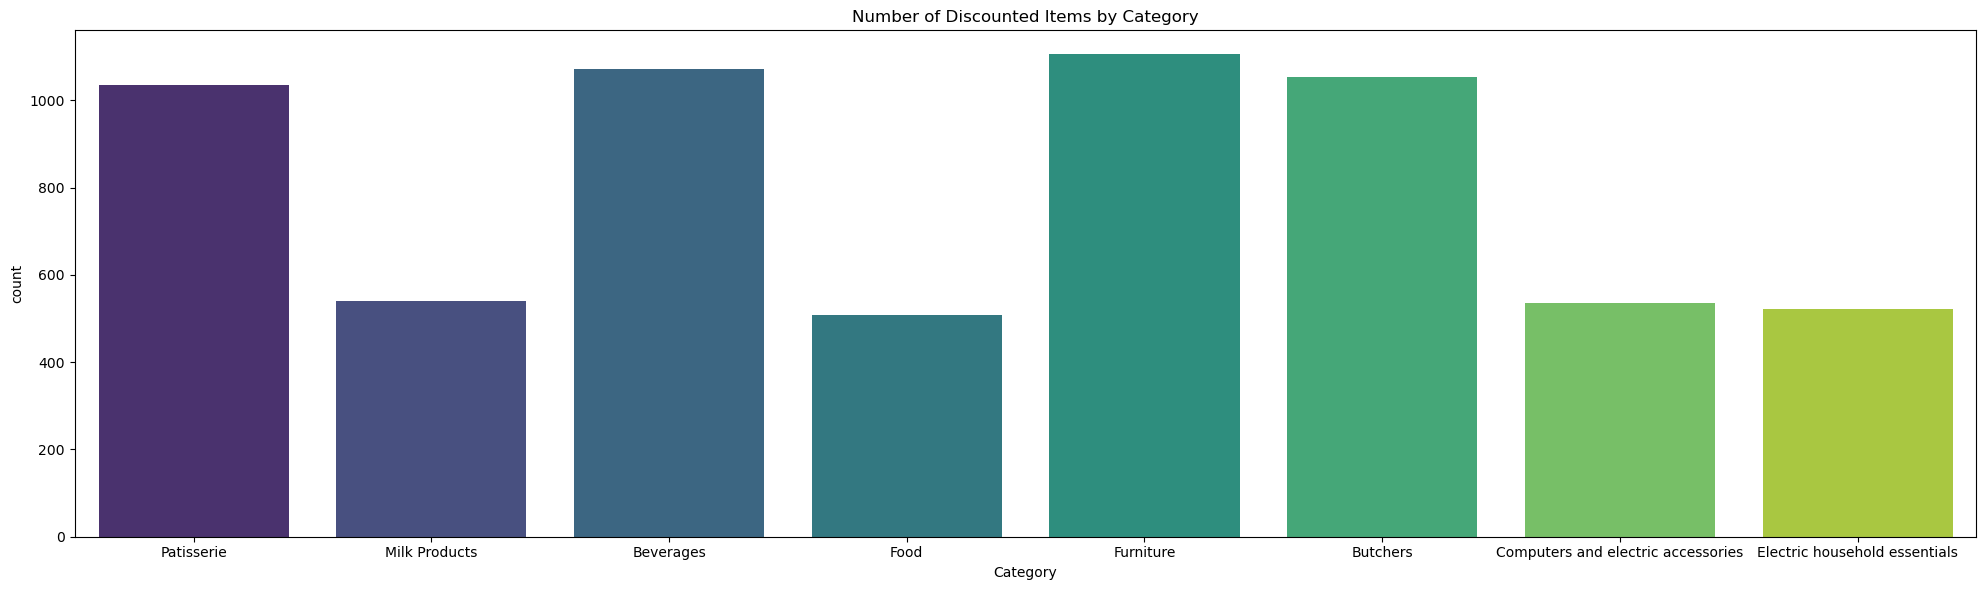

In [72]:
plt.figure(figsize=(20,6))
sns.countplot(x='Category', data=discounted_items, palette='viridis',width=0.8)
plt.title('Number of Discounted Items by Category')
plt.tight_layout()
plt.show()
